![](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.

In [58]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')
%matplotlib inline
from plotly.subplots import make_subplots
pd.set_option('display.max_rows', 50)

In [59]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [60]:
india_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-23-2021.csv')
india_df.drop(['FIPS', 'Admin2'], axis=1, inplace=True)
india_df.dropna(inplace=True)
india_df.loc[india_df['Province_State'] == 'Dadra and Nagar Haveli and Daman and Diu', 'Province_State'] = 'Daman and Diu'
india_df = india_df[india_df['Country_Region']=='India']
india_df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
249,Andaman and Nicobar Islands,India,2021-04-24 04:20:38,11.225999,92.968178,5569,65,5358.0,146.0,"Andaman and Nicobar Islands, India",1335.376322,1.167175
250,Andhra Pradesh,India,2021-04-24 04:20:38,15.912900,79.740000,1009228,7579,927418.0,74231.0,"Andhra Pradesh, India",1872.290303,0.750970
251,Arunachal Pradesh,India,2021-04-24 04:20:38,27.768456,96.384277,17430,56,16921.0,453.0,"Arunachal Pradesh, India",1109.867313,0.321285
252,Assam,India,2021-04-24 04:20:38,26.357149,92.830441,233453,1172,218339.0,13942.0,"Assam, India",655.637218,0.502028
253,Bihar,India,2021-04-24 04:20:38,25.679658,85.604840,378442,2010,300012.0,76420.0,"Bihar, India",303.238962,0.531125


In [61]:
timeseries_df.shape

(115209, 8)

In [62]:
india_df.isnull().sum()

Province_State         0
Country_Region         0
Last_Update            0
Lat                    0
Long_                  0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
Combined_Key           0
Incident_Rate          0
Case_Fatality_Ratio    0
dtype: int64

In [64]:
Total_Active_Cases=india_df.groupby('Province_State')['Confirmed','Deaths','Recovered'].sum().sort_values(by='Confirmed',ascending=False)
Total_Active_Cases.style.background_gradient(cmap='Blues')

,Confirmed,Deaths,Recovered
Province_State,,,
Maharashtra,4161676,63252,3.40479e+06
Kerala,1350501,5055,1.16614e+06
Karnataka,1274959,14075,1.04655e+06
Tamil Nadu,1051487,13395,943044
Uttar Pradesh,1013370,10737,728980
Andhra Pradesh,1009228,7579,927418
Delhi,980679,13541,875109
West Bengal,713780,10825,628218
Chhattisgarh,622965,6893,492593


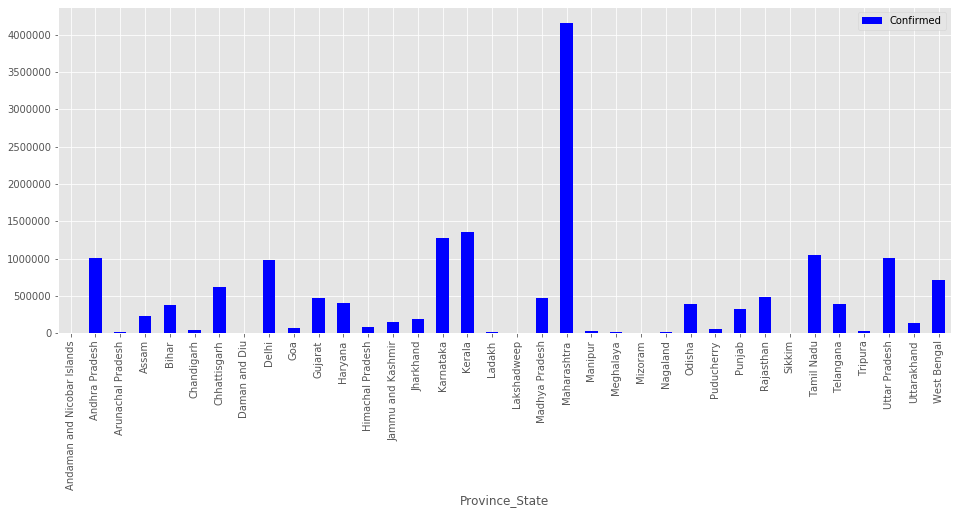

In [17]:
india_df.plot(kind='bar',x='Province_State',y='Confirmed', figsize=(16,6), color = 'b')
plt.show()

In [18]:
india_df.iplot(kind='bar',x='Province_State',y='Confirmed', colors = 'Blue')

<BarContainer object of 36 artists>

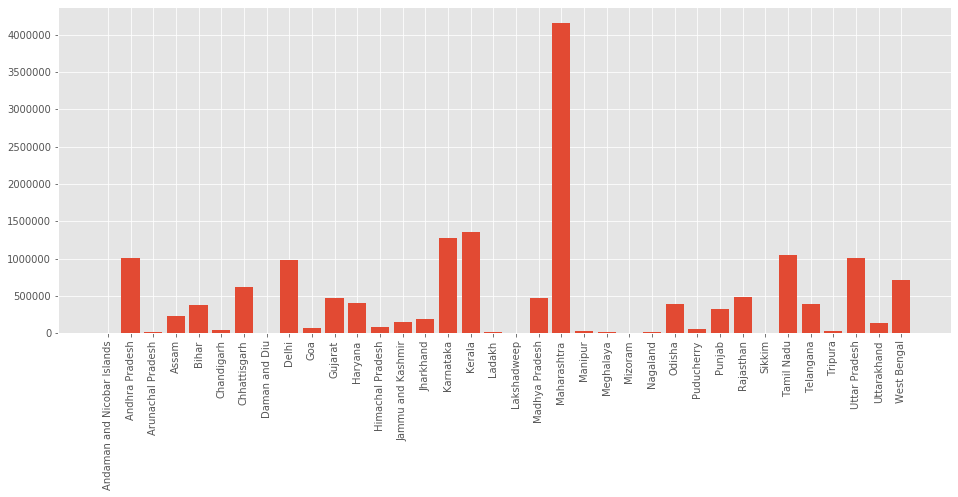

In [19]:
#Matplotlib vis
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.bar(india_df['Province_State'],india_df['Confirmed'])

In [20]:
px.bar(india_df,x='Province_State',y='Confirmed')

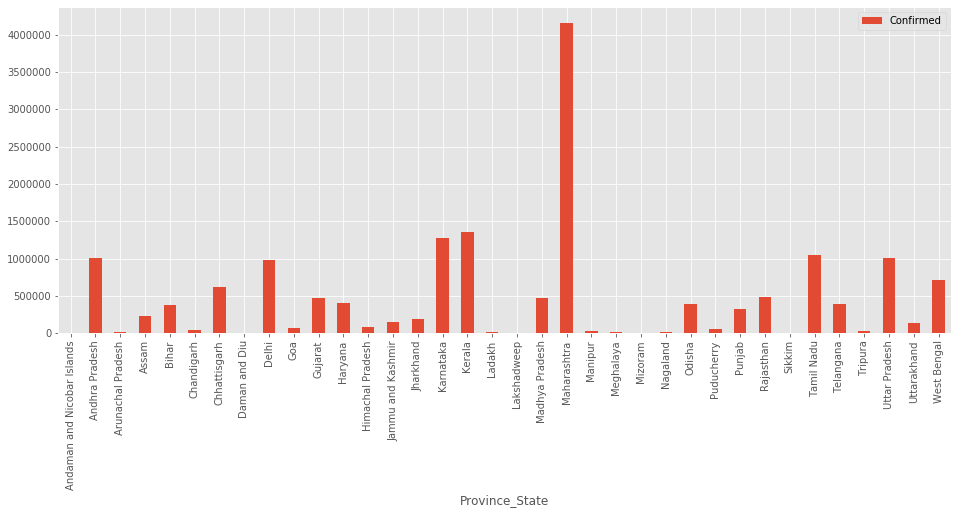

In [21]:
india_df.plot(kind='bar',x='Province_State',y='Confirmed',figsize=(16,6))

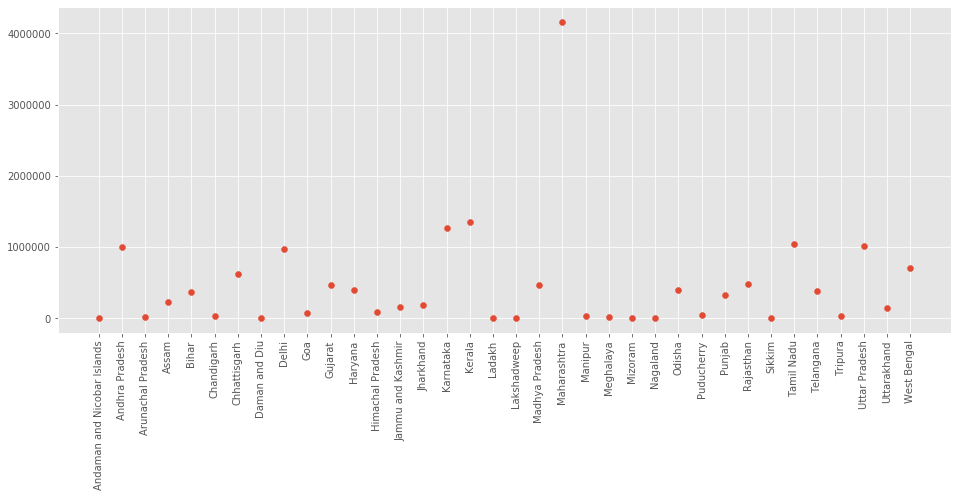

In [22]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.scatter(india_df['Province_State'],india_df['Confirmed'])

In [23]:
india_df.iplot(kind='scatter',x='Province_State',y='Confirmed',mode='markers+lines',title='Corona',xTitle='Name of State / UT',yTitle='Total Cases',colors='red',size=15)

In [24]:
px.scatter(india_df,x='Province_State',y='Confirmed')

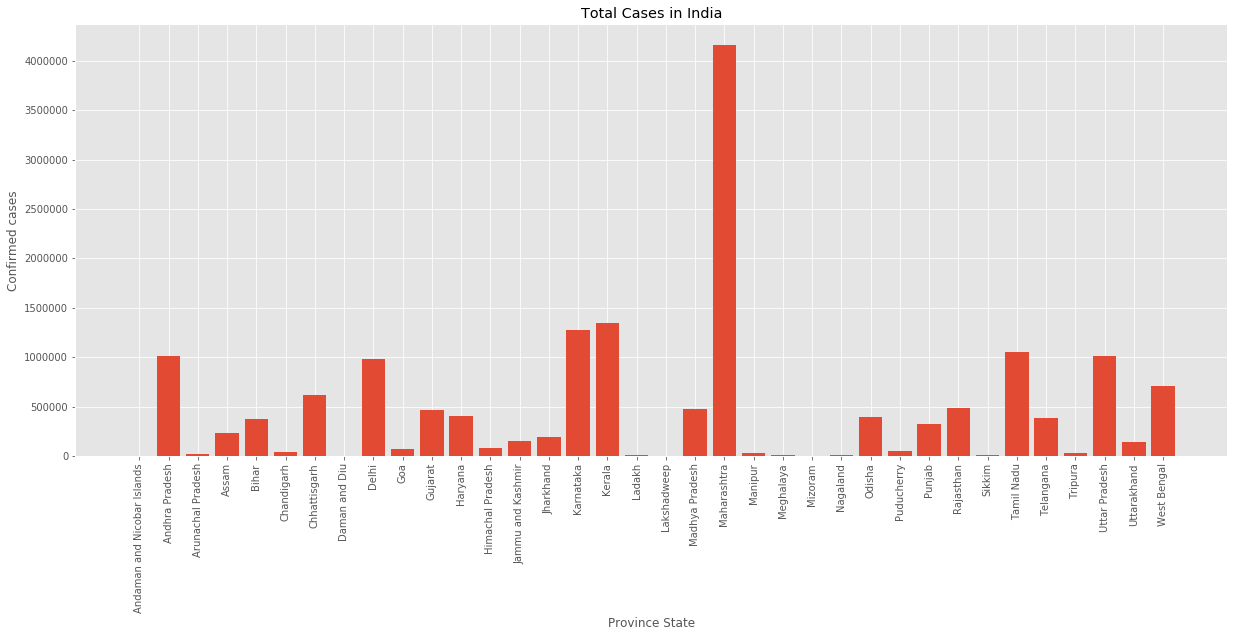

In [25]:
fig=plt.figure(figsize=(16,6))
axes=fig.add_axes([0,0,1,1])
axes.bar(india_df['Province_State'],india_df['Confirmed'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Province State")
axes.set_ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.show()

In [26]:
fig=go.Figure()
fig.add_trace(go.Bar(x=india_df['Province_State'],y=india_df['Confirmed']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Province State'),yaxis=dict(title='Confirmed cases'))

In [67]:
total_cases_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Confirmed'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.00001,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='blue',fill_color='blue',fill_opacity=0.3).add_to(total_cases_map)
    

In [68]:
total_cases_map

In [69]:
total_death_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Deaths'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.0005,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Deaths in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(total_death_map)

In [70]:
total_death_map

In [71]:
total_cured_map=folium.Map(location=[20,80],zoom_start=4,tiles='OpenStreetMap')

for lat,long,value, name in zip(india_df['Lat'],india_df['Long_'],india_df['Recovered'],india_df['Province_State']):
    folium.CircleMarker([lat,long],radius=value*0.00001,popup=('<strong>State Name</strong>: '+str(name).capitalize()+'<br>''<strong>Total Deaths in ' +str(name).capitalize()+'</strong>:' + str(value)+ '<br>'),color='green',fill_color='green',fill_opacity=0.3).add_to(total_cured_map)

In [72]:
total_cured_map